In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


# Select Data
The files are stored in folders named by the date and time of the recorded data. Here, you can specify which recording you want to look at.

In [18]:
UnitName = "HYS-HS4"
FolderName= "2018-07-29T03.45.00+00.00_2018-07-29T04.15.00+00.00" # Date and time, to and from, of recording
FolderName="2018-01-06T07.45.00+00.00_2018-01-06T08.15.00+00.00"
MeasurementName = "WindSpeed"
DataFileName = f"{UnitName}-{MeasurementName}.csv"
DataFilePath = os.path.join(FolderName,DataFileName)

if os.path.isfile(DataFilePath):
    print(f"{DataFilePath} exists!")
else:
    print(f"{DataFilePath} does not exist")

2018-01-06T07.45.00+00.00_2018-01-06T08.15.00+00.00\HYS-HS4-WindSpeed.csv exists!


# Load the data

In [19]:
# Load the wind speed data
df = pd.read_csv(DataFilePath, skiprows=1)
df.columns = ["Index", "Time", "Value"]
df["Time"] = pd.to_datetime(df["Time"])
df.head()
TimeStart = df["Time"].values[0]
TimeEnd = df["Time"].values[-1]

# Plot wind speed time series

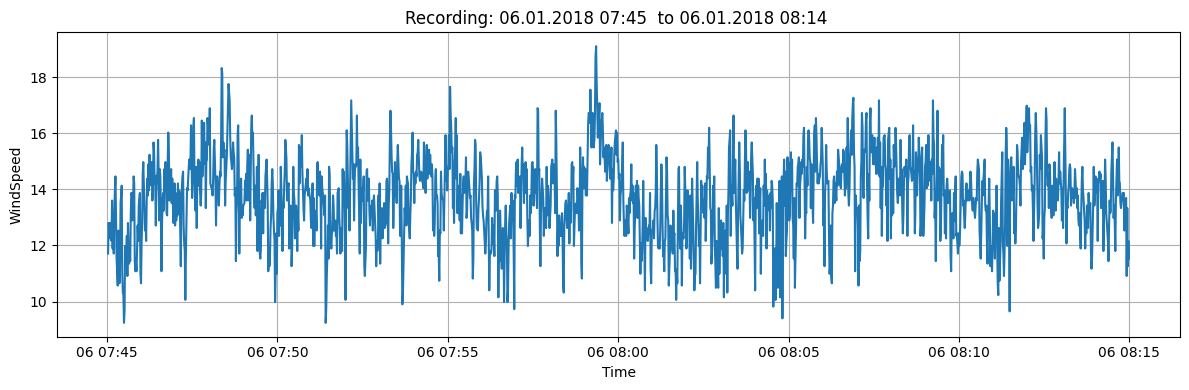

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(df["Time"], df["Value"], label="Wind Speed")
plt.xlabel("Time")
plt.ylabel(f"{MeasurementName}")
plt.title(f"Recording: {pd.to_datetime(TimeStart).strftime("%d.%m.%Y %H:%M ")} to {pd.to_datetime(TimeEnd).strftime("%d.%m.%Y %H:%M ")}")
plt.grid(True)
plt.tight_layout()
plt.show()


# First-order PDF (histogram of wind speeds)

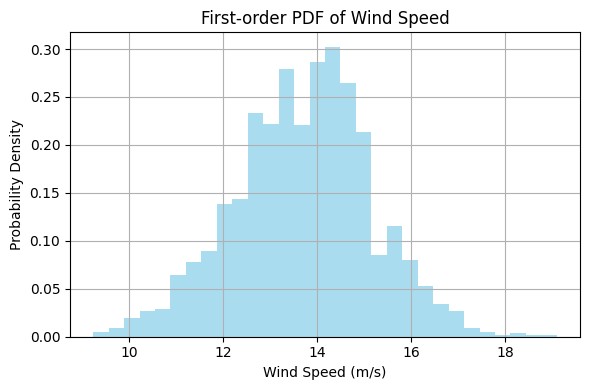

In [21]:

plt.figure(figsize=(6, 4))
plt.hist(df["Value"], bins=30, density=True, alpha=0.7, color='skyblue')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Probability Density")
plt.title("First-order PDF of Wind Speed")
plt.grid(True)
plt.tight_layout()
plt.show()


# Second-order PDF (joint histogram at two time points)

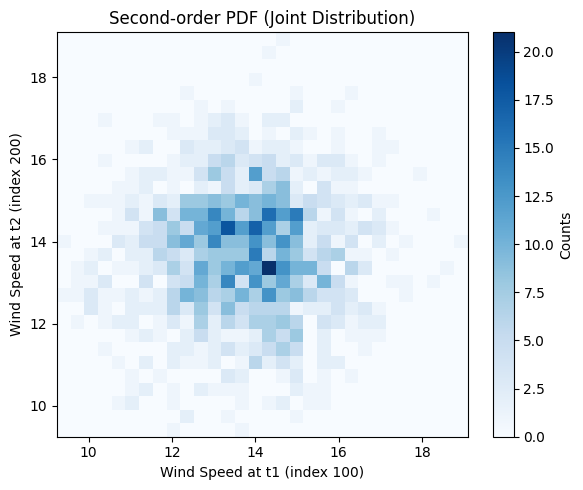

In [22]:
t1_idx = 100
t2_idx = 200
values_t1 = df["Value"].shift(-t1_idx).dropna()
values_t2 = df["Value"].shift(-t2_idx).dropna()
min_len = min(len(values_t1), len(values_t2))
values_t1 = values_t1[:min_len]
values_t2 = values_t2[:min_len]

plt.figure(figsize=(6, 5))
plt.hist2d(values_t1, values_t2, bins=30, cmap='Blues')
plt.xlabel(f"Wind Speed at t1 (index {t1_idx})")
plt.ylabel(f"Wind Speed at t2 (index {t2_idx})")
plt.title("Second-order PDF (Joint Distribution)")
plt.colorbar(label="Counts")
plt.tight_layout()
plt.show()


# Stationarity: mean and variance over time

Play with the parameter window size. 
- Would you say this is a stationary process?

Try to load a recording of the same parameter from a different time.
- Is the mean and variance the same as for the first recording?
- Would you say the new recording is a stationary process?

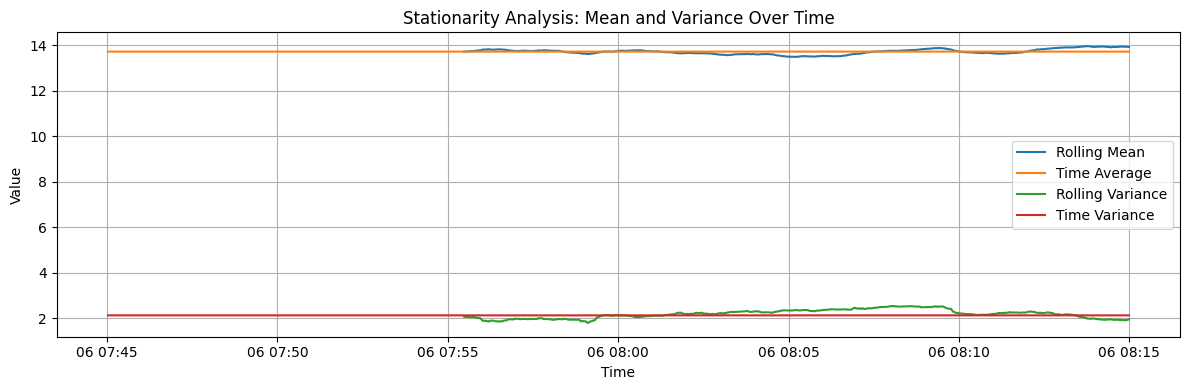

In [ ]:
window_size = 600  # 1 minute window
rolling_mean = df["Value"].rolling(window=window_size).mean()
rolling_var = df["Value"].rolling(window=window_size).var()

plt.figure(figsize=(12, 4))
plt.plot(df["Time"], rolling_mean, label="Rolling Mean")
plt.plot(df["Time"], df["Value"].mean()*np.ones(len(df)), label="Time Average")
plt.plot(df["Time"], rolling_var, label="Rolling Variance")
plt.plot(df["Time"], df["Value"].var()*np.ones(len(df)), label="Time Variance")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Stationarity Analysis: Mean and Variance Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Ergodicity: compare time average vs ensemble average
- time_avg takes the time average of the full measurement
- ensamble_avg computes an approximate ensamble average by sampling the wind speed at regular intervals, but not all samples

Play with the window_size parameter. Compare the time average and the ensamble average. What does that say about the process?

In [25]:

window_size = 60  # 1 minute window
time_avg = df["Value"].mean()
ensemble_avg = np.mean([df["Value"].iloc[i] for i in range(0, len(df), window_size)])  # sample every 10 minutes

print("Ergodicity Analysis:")
print(f"Time Average: {time_avg:.2f}")
print(f"Ensemble Average (sampled every minute): {ensemble_avg:.2f}")


Ergodicity Analysis:
Time Average: 13.71
Ensemble Average (sampled every minute): 13.51
